# Inicializar Doogle Drive para el acceso al dataset

In [16]:
%cd Splitted-Dataset
!dir

[WinError 2] El sistema no puede encontrar el archivo especificado: 'Splitted-Dataset'
c:\Users\Migue\OneDrive\Escritorio\Documentos de tarea\Universidad\Octavo semestre\Desarrollo de aplicaciones\M2\Splitted-Dataset


C:\Users\Migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\IPython\core\magics\osm.py:393: UserWarning: This is now an optional IPython functionality, using bookmarks requires you to install the `pickleshare` library.
  bkms = self.shell.db.get('bookmarks', {})


 El volumen de la unidad C no tiene etiqueta.
 El numero de serie del volumen es: A462-E264

 Directorio de c:\Users\Migue\OneDrive\Escritorio\Documentos de tarea\Universidad\Octavo semestre\Desarrollo de aplicaciones\M2\Splitted-Dataset

16/05/2024  12:15 p. m.    <DIR>          .
16/05/2024  12:15 p. m.    <DIR>          ..
16/05/2024  12:15 p. m.    <DIR>          test
16/05/2024  12:15 p. m.    <DIR>          train
16/05/2024  12:15 p. m.    <DIR>          val
               0 archivos              0 bytes
               5 dirs  343,960,571,904 bytes libres


# Importar librerías

In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import os
import tensorflow as tf
# Recibe información y produce información nueva
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Configuración del Image Data Generator

In [20]:
# Carga de imagenes
base_dir = ""
train_dir = os.path.join(base_dir, "train")
val_dir = os.path.join(base_dir, "val")
test_dir = os.path.join(base_dir, "test")

# Configuración del ImageDataGenerator para modificar las imágenes de train
train_datagen = ImageDataGenerator(
    rescale = 1./255, # Escalado de los pixeles de la imagen
    rotation_range = 100,
    shear_range = 10,
    zoom_range = [0.3, 0.9],
    horizontal_flip = True,
)

train


# Generación de Imágenes modificadas del train dataset (Data augmentation)

Found 4113 images belonging to 11 classes.
(32, 150, 150, 3)
[[0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0

<Figure size 640x480 with 0 Axes>

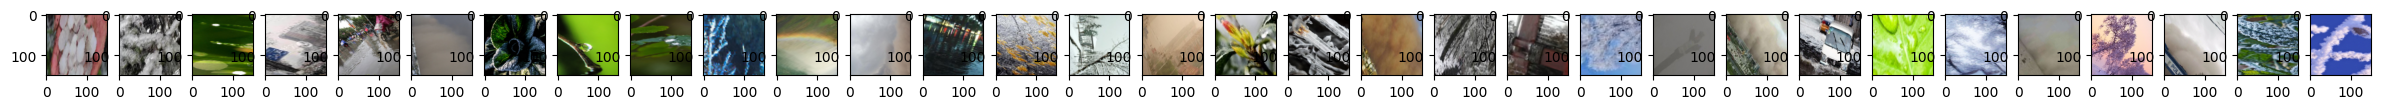

In [22]:
train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size = (150, 150),
    batch_size = 32,
    class_mode = "categorical",
    # Guardar imágenes generadas
    # save_to_dir = "augmented",
    # save_prefix = "aug",
    # save_format = "jpg"
)

images, labels = train_generator[0]

print(images.shape)
print(labels)

plt.figure()

f, axarr = plt.subplots(1, images.shape[0], figsize=(30, 4))

for i in range(images.shape[0]):
  axarr[i].imshow(images[i])

# Re-escalado de las imágenes de las separaciones originales

In [23]:
train_image_rescale = ImageDataGenerator(rescale=1./255)
train_rescale_generator = train_image_rescale.flow_from_directory(
    train_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

val_image_rescale = ImageDataGenerator(rescale=1./255)
val_rescale_generator = val_image_rescale.flow_from_directory(
    val_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

test_image_rescale = ImageDataGenerator(rescale=1./255)
test_rescale_generator = test_image_rescale.flow_from_directory(
    test_dir,
    target_size=(150, 150),
    batch_size=32,
    class_mode="categorical"
)

Found 4113 images belonging to 11 classes.
Found 1369 images belonging to 11 classes.
Found 1380 images belonging to 11 classes.


# Implementación del modelo

In [24]:
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.constraints import max_norm
from tensorflow.keras.models import Sequential

img_shape = (150, 150, 3)

# Arquitectura del modelo
model = Sequential()
model.add(
    Conv2D(32, (3, 3), activation='relu', kernel_constraint=max_norm(3), input_shape=img_shape)
)
model.add(MaxPooling2D((2, 2)))
model.add(
    Conv2D(64, (3, 3), activation='relu', kernel_constraint=max_norm(3))
)
model.add(MaxPooling2D((2, 2)))
model.add(Dropout(0.2))
model.add(
    Conv2D(128, (3, 3), activation='relu', kernel_constraint=max_norm(3))
)
model.add(MaxPooling2D((2, 2)))
model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.5))
model.add(Dense(11, activation='softmax'))

# Compilación del modelo
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

C:\Users\Migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


# Entrenamiento del modelo (stage 1): sin usar data augmentation

In [25]:
epochs = 30

history = model.fit(train_rescale_generator, epochs=epochs, validation_data=val_rescale_generator)

Epoch 1/30


C:\Users\Migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


129/129 ━━━━━━━━━━━━━━━━━━━━ 68s 501ms/step - accuracy: 0.2710 - loss: 0.3338 - val_accuracy: 0.5997 - val_loss: 0.1818
Epoch 2/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 54s 411ms/step - accuracy: 0.5771 - loss: 0.1837 - val_accuracy: 0.6508 - val_loss: 0.1598
Epoch 3/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 53s 404ms/step - accuracy: 0.6432 - loss: 0.1574 - val_accuracy: 0.6939 - val_loss: 0.1453
Epoch 4/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 51s 389ms/step - accuracy: 0.6660 - loss: 0.1439 - val_accuracy: 0.6538 - val_loss: 0.1499
Epoch 5/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 50s 385ms/step - accuracy: 0.7366 - loss: 0.1269 - val_accuracy: 0.6961 - val_loss: 0.1402
Epoch 6/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 50s 383ms/step - accuracy: 0.7553 - loss: 0.1187 - val_accuracy: 0.7034 - val_loss: 0.1379
Epoch 7/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 51s 388ms/step - accuracy: 0.8139 - loss: 0.0953 - val_accuracy: 0.7195 - val_loss: 0.1295
Epoch 8/30
129/129 ━━━━━━━━━━━━━━━━━━━━ 50s 383ms/step - accuracy: 0.8472 - loss: 0.0819 - val

## Evaluación del modelo base (stage 1): Sin usar data augmentation

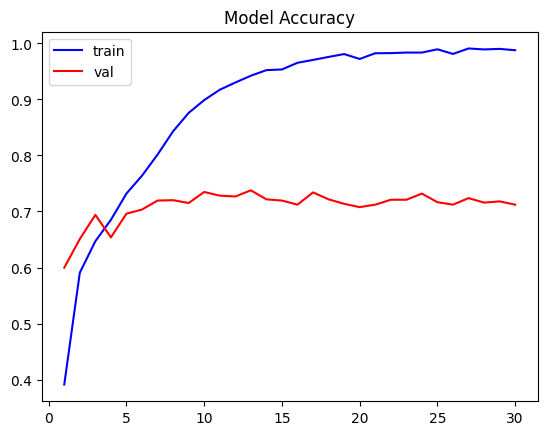

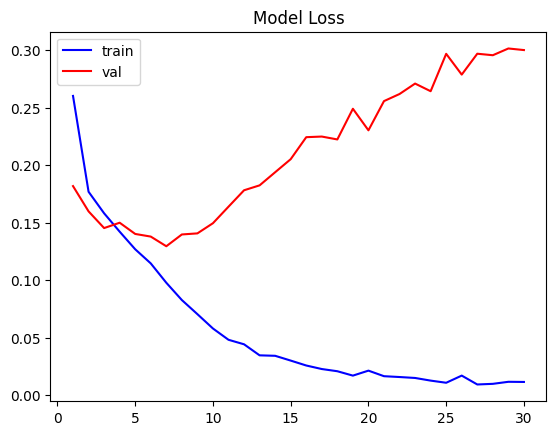

In [26]:
train_acc = history.history['accuracy']
train_loss = history.history['loss']

val_acc = history.history['val_accuracy']
val_loss = history.history['val_loss']

num_epochs = range(1, len(train_acc) + 1)

plt.plot(num_epochs, train_acc,'b', label='train')
plt.plot(num_epochs, val_acc,'r', label='val')
plt.title('Model Accuracy')
plt.legend()

plt.figure()

plt.plot(num_epochs, train_loss,'b', label='train')
plt.plot(num_epochs, val_loss,'r', label='val')
plt.title('Model Loss')
plt.legend()


# Entrenamiento del modelo (stage 2): con data augmentation

In [27]:
epochs = 100

history_2 = model.fit(train_generator, epochs=epochs, validation_data=val_rescale_generator)

Epoch 1/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 62s 472ms/step - accuracy: 0.4485 - loss: 0.3013 - val_accuracy: 0.6318 - val_loss: 0.1616
Epoch 2/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 62s 471ms/step - accuracy: 0.5512 - loss: 0.1920 - val_accuracy: 0.6640 - val_loss: 0.1492
Epoch 3/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 62s 467ms/step - accuracy: 0.5878 - loss: 0.1786 - val_accuracy: 0.6888 - val_loss: 0.1404
Epoch 4/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 60s 456ms/step - accuracy: 0.5984 - loss: 0.1716 - val_accuracy: 0.7012 - val_loss: 0.1366
Epoch 5/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 65s 493ms/step - accuracy: 0.6367 - loss: 0.1597 - val_accuracy: 0.6903 - val_loss: 0.1425
Epoch 6/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 63s 478ms/step - accuracy: 0.6292 - loss: 0.1587 - val_accuracy: 0.7239 - val_loss: 0.1275
Epoch 7/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 64s 484ms/step - accuracy: 0.6390 - loss: 0.1548 - val_accuracy: 0.6888 - val_loss: 0.1380
Epoch 8/100
129/129 ━━━━━━━━━━━━━━━━━━━━ 64s 487ms/step - accuracy: 0.6342 -

## Evaluación del modelo base (stage 2): Con data augmentation

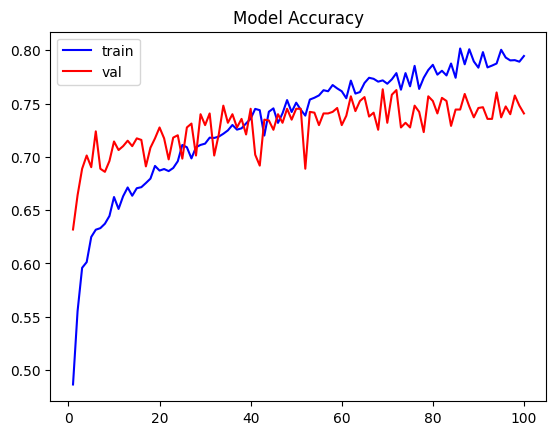

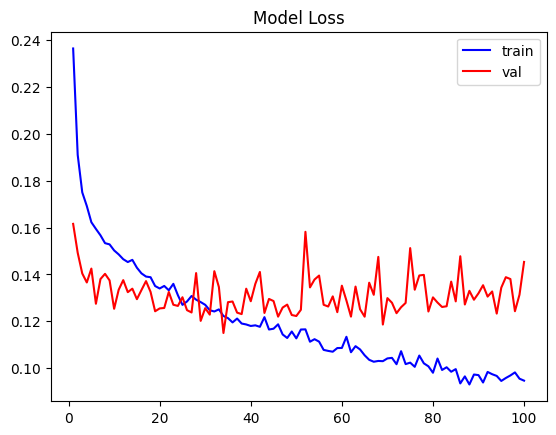

In [28]:
train_acc = history_2.history['accuracy']
train_loss = history_2.history['loss']

val_acc = history_2.history['val_accuracy']
val_loss = history_2.history['val_loss']

num_epochs = range(1, len(train_acc) + 1)

plt.plot(num_epochs, train_acc,'b', label='train')
plt.plot(num_epochs, val_acc,'r', label='val')
plt.title('Model Accuracy')
plt.legend()

plt.figure()

plt.plot(num_epochs, train_loss,'b', label='train')
plt.plot(num_epochs, val_loss,'r', label='val')
plt.title('Model Loss')
plt.legend()

# Probar el modelo (stage 2)

43/43 ━━━━━━━━━━━━━━━━━━━━ 6s 132ms/step - accuracy: 0.7534 - loss: 0.1442
test accuracy: 0.7536337375640869
test loss: 0.13673262298107147
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 82ms/step
Matriz de confusión
Classification Report
              precision    recall  f1-score   support

         dew       1.00      0.60      0.75         5
     fogsmog       1.00      0.67      0.80         3
       frost       0.00      0.00      0.00         1
       glaze       0.50      0.75      0.60         4
        hail       1.00      0.67      0.80         3
   lightning       0.50      1.00      0.67         1
        rain       0.62      1.00      0.77         5
     rainbow       1.00      1.00      1.00         2
        rime       0.75      0.75      0.75         4
   sandstorm       0.50      0.50      0.50         2
        snow       0.00      0.00      0.00         2

    accuracy                           0.69        32
   macro avg       0.62      0.63      0.60        32
weighted avg       0.7

C:\Users\Migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classification.py:1517: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Migue\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\metrics\_classificati

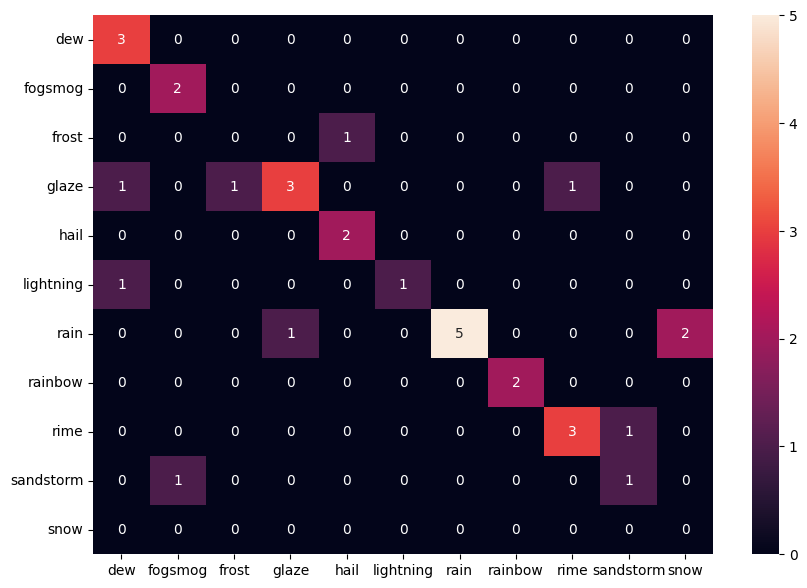

In [66]:
#steps = número de archivos / tamaño del batch
test_loss, test_acc = model.evaluate(test_rescale_generator, steps=43)
print("test accuracy:", test_acc)
print("test loss:", test_loss)

# Matriz de confusión
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sn

test_imgs = test_rescale_generator[0][0]
test_labels = test_rescale_generator[0][1]

# for _ in range(43):
#   imgs = test_rescale_generator[0][0]
#   labels = test_rescale_generator[0][1]
#   test_imgs.append(imgs) 
#   test_labels.append(labels)

predictions = model.predict(test_imgs)
predictions = np.argmax(predictions, axis=1)

ground_truth = np.argmax(test_labels, axis=1)

class_names = list(test_rescale_generator.class_indices.keys())
conf_mat = confusion_matrix(predictions, ground_truth)
print("Matriz de confusión")

df_cm = pd.DataFrame(conf_mat, index = [i for i in class_names],
                  columns = [i for i in class_names])
plt.figure(figsize = (10,7))
sn.heatmap(df_cm, annot=True)

# Reporte de clasificación
print("Classification Report")
print(classification_report(ground_truth, predictions, target_names=class_names))


# Implementación de modelo con Transfer Learning